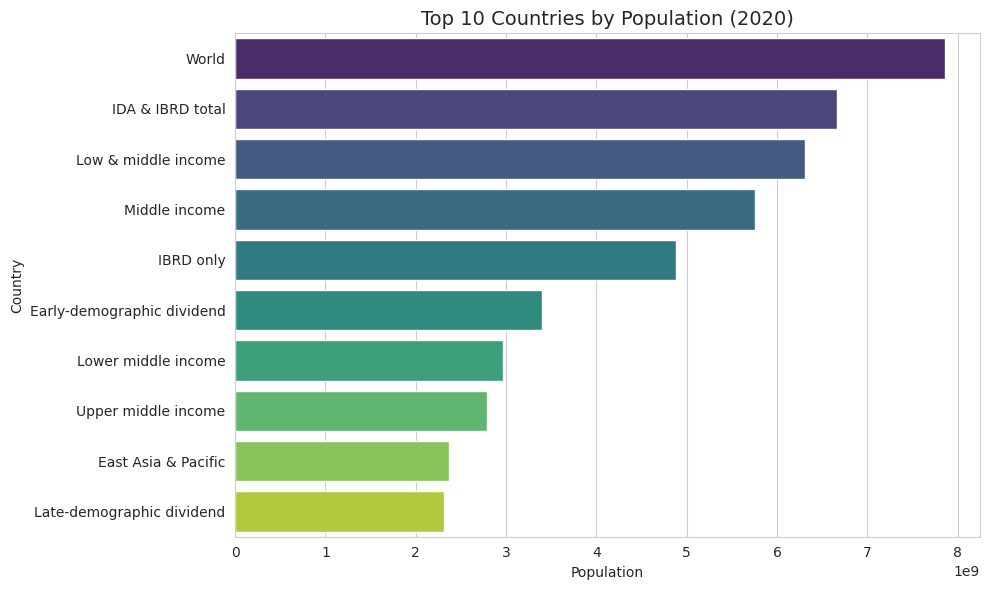

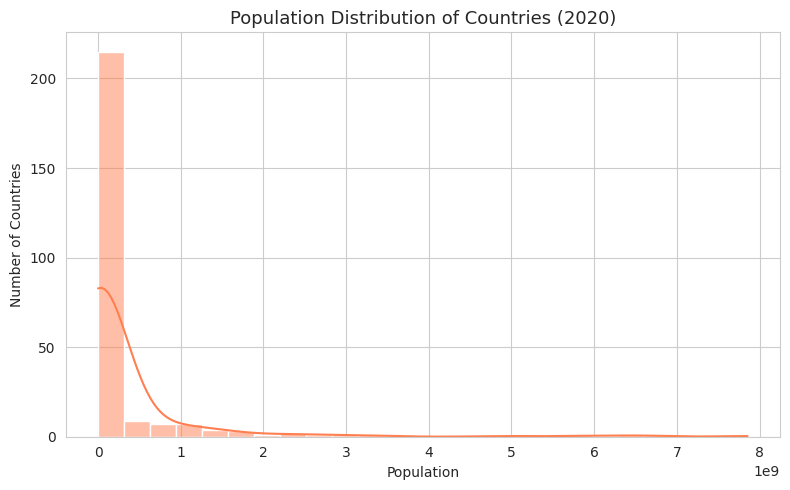

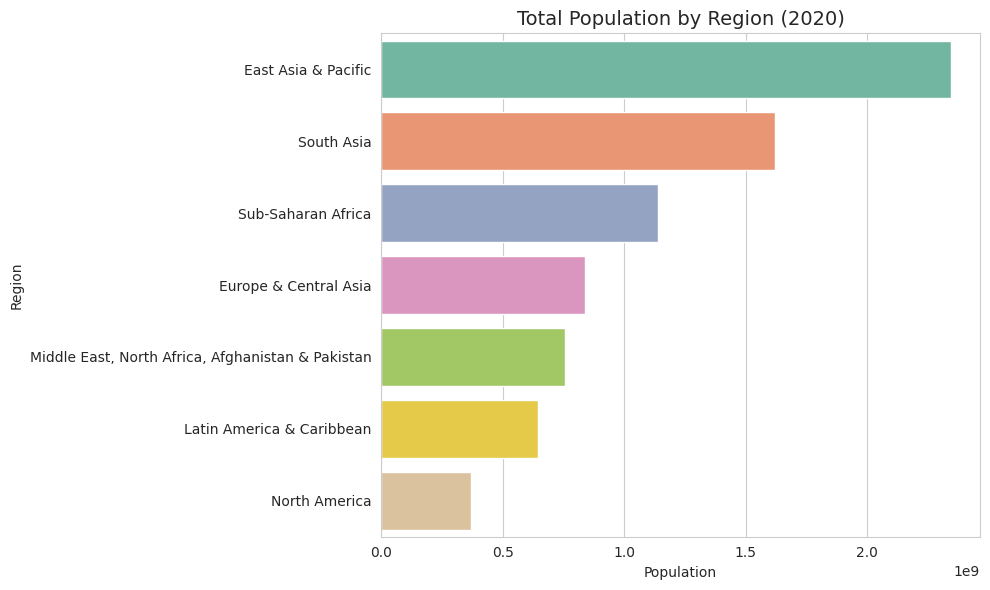

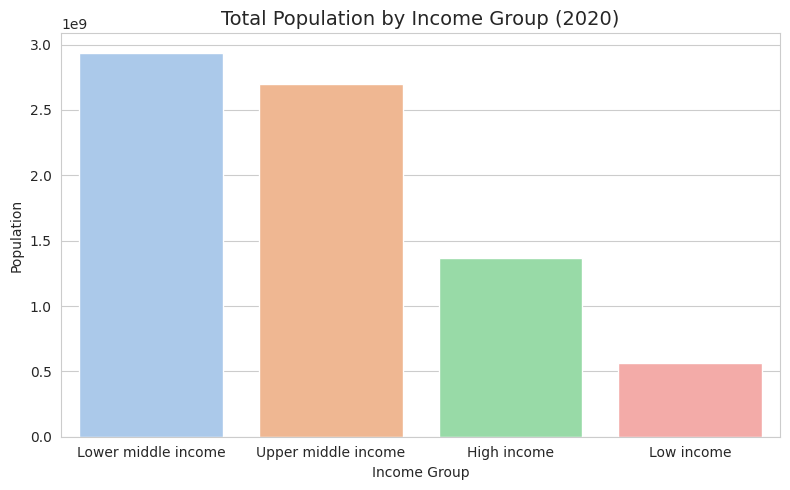

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ---- 1. Load & clean main population data ----
pop_url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%201/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
population_df = pd.read_csv(pop_url, skiprows=4)
population_df = population_df[['Country Name', '2020']].dropna()
population_df.columns = ['Country', 'Population']
population_df['Country'] = population_df['Country'].str.strip()

# ---- 2. Load & clean metadata ----
meta_url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%201/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"
meta_df = pd.read_csv(meta_url)
meta_df.columns = meta_df.columns.str.strip()
meta_df = meta_df[['TableName', 'Region', 'IncomeGroup']]
meta_df.columns = ['Country', 'Region', 'IncomeGroup']
meta_df['Country'] = meta_df['Country'].str.strip()

# ---- 3. Filter out non-countries ----
valid_countries = set(meta_df['Country'].unique())
population_df = population_df[population_df['Country'].isin(valid_countries)].copy()
population_df.reset_index(drop=True, inplace=True)

# ---- 4. Merge with metadata ----
merged_df = pd.merge(population_df, meta_df, on='Country', how='left')

# Optional: Debug unmatched entries (for dev only)
# unmatched = set(population_df['Country']) - valid_countries
# print("Unmatched entries:", unmatched)

# ---- 5. Bar Chart: Top 10 Countries ----
top10 = population_df.sort_values(by='Population', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='Country', x='Population', hue='Country', legend=False, palette='viridis')
plt.title('Top 10 Countries by Population (2020)', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# ---- 6. Histogram: Population Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(population_df['Population'], bins=25, kde=True, color='coral')
plt.title('Population Distribution of Countries (2020)', fontsize=13)
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

# ---- 7. Region-wise Total Population ----
region_group = merged_df.groupby('Region')['Population'].sum().reset_index()
region_group = region_group.sort_values(by='Population', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=region_group, y='Region', x='Population', hue='Region', legend=False, palette='Set2')
plt.title('Total Population by Region (2020)', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# ---- 8. Income Group-wise Population ----
income_group = merged_df.groupby('IncomeGroup')['Population'].sum().reset_index()
income_group = income_group.sort_values(by='Population', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=income_group, x='IncomeGroup', y='Population', hue='IncomeGroup', legend=False, palette='pastel')
plt.title('Total Population by Income Group (2020)', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Population')
plt.tight_layout()
plt.show()
